<a href="https://colab.research.google.com/github/issacridhin/LabWorks/blob/CV/2348546_Lab5_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Packages**

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**ideal low-pass using Fourier Transform**

In [19]:
def ideal_low_pass_filter(image, cutoff_frequency):
    # Compute the 2D Fourier Transform of the input image
    f = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f)

    # Compute the distance from the center for each point in the Fourier domain
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if distance <= cutoff_frequency:
                mask[i, j] = 1

    # Apply the mask to the Fourier spectrum
    f_filtered = f_shifted * mask

    # Perform inverse Fourier Transform
    f_filtered_shifted = np.fft.ifftshift(f_filtered)
    img_back = np.fft.ifft2(f_filtered_shifted)
    img_back = np.abs(img_back)

    return img_back

**ideal high-pass using Fourier Transform**

In [20]:
def ideal_high_pass_filter(image, cutoff_frequency):
    # Compute the 2D Fourier Transform of the input image
    f = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f)

    # Compute the distance from the center for each point in the Fourier domain
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if distance <= cutoff_frequency:
                mask[i, j] = 0

    # Apply the mask to the Fourier spectrum
    f_filtered = f_shifted * mask

    # Perform inverse Fourier Transform
    f_filtered_shifted = np.fft.ifftshift(f_filtered)
    img_back = np.fft.ifft2(f_filtered_shifted)
    img_back = np.abs(img_back)

    return img_back

**Input the Image**

In [27]:
# Read the input image
image = cv2.imread('/content/pexels-evg-kowalievska-1170986.jpg', cv2.IMREAD_GRAYSCALE)

# Perform ideal low-pass filtering with cutoff frequency 50
low_pass_filtered = ideal_low_pass_filter(image, 70)

# Perform ideal high-pass filtering with cutoff frequency 50
high_pass_filtered = ideal_high_pass_filter(image, 70)

**Displaying the result**

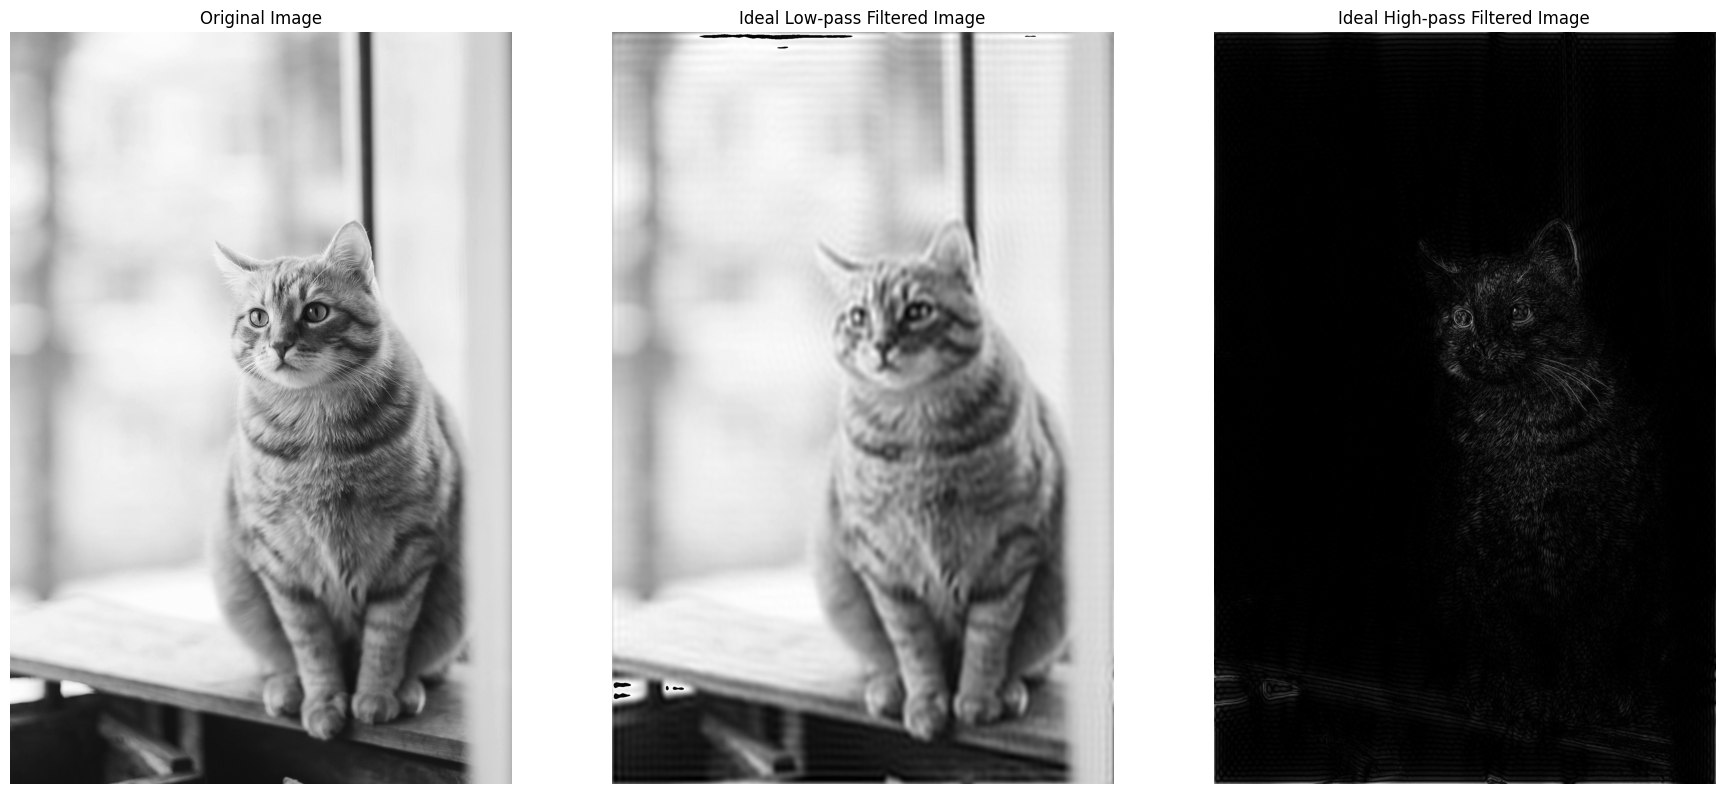

In [28]:
# Display the original and filtered images using matplotlib
plt.figure(figsize=(22, 10))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(low_pass_filtered.astype(np.uint8), cmap='gray')
plt.title('Ideal Low-pass Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(high_pass_filtered.astype(np.uint8), cmap='gray')
plt.title('Ideal High-pass Filtered Image')
plt.axis('off')

plt.show()